In [242]:
# !pip install scikit-fuzzy --quiet

In [243]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

## MODELAGEM DAS VARIÁVEIS DO PROBLEMA

In [244]:
_12_months = np.arange(0, 12, 0.5)

marco_01 = ctrl.Antecedent(_12_months, 'Marco 1')
marco_02 = ctrl.Antecedent(_12_months, 'Marco 2')

risco = ctrl.Consequent(np.arange(0, 11, 1), 'Risco')

In [245]:
marco_01['normal'] = fuzz.trapmf(marco_01.universe, [0, 0, 1, 3])
marco_01['levemente atrasado'] = fuzz.trapmf(marco_01.universe, [1, 3, 5, 7])
marco_01['atrasado'] = fuzz.trapmf(marco_01.universe, [4.5, 6.5, 8.5, 10.5])
marco_01['altamente atrasado'] = fuzz.trapmf(marco_01.universe, [8, 10, 12, 12])

## Marco 1: Postura: barriga para cima, pernas e braços fletidos, cabeça lateralizada

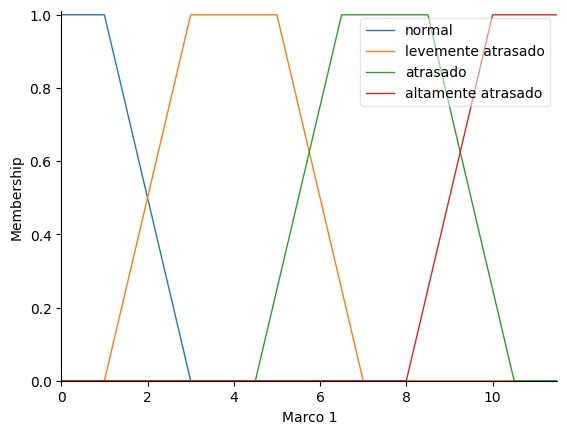

In [246]:
marco_01.view()

## Marco 2: Observa um rosto

In [247]:
marco_02['normal'] = fuzz.trapmf(marco_02.universe, [0, 0, 1, 3])
marco_02['levemente atrasado'] = fuzz.trapmf(marco_02.universe, [1, 3, 5, 7])
marco_02['atrasado'] = fuzz.trapmf(marco_02.universe, [4.5, 6.5, 8.5, 10.5])
marco_02['altamente atrasado'] = fuzz.trapmf(marco_02.universe, [8, 10, 12, 12])

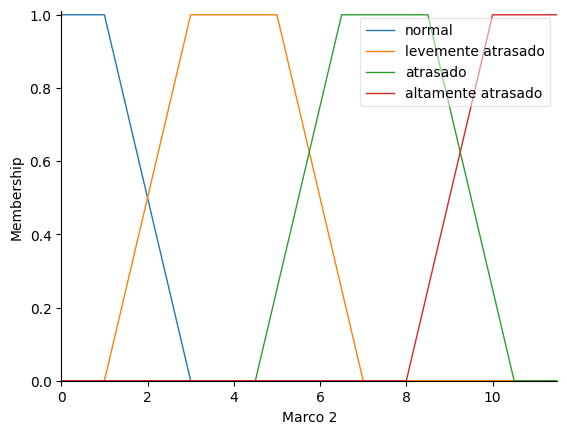

In [248]:
marco_02.view()

## Risco

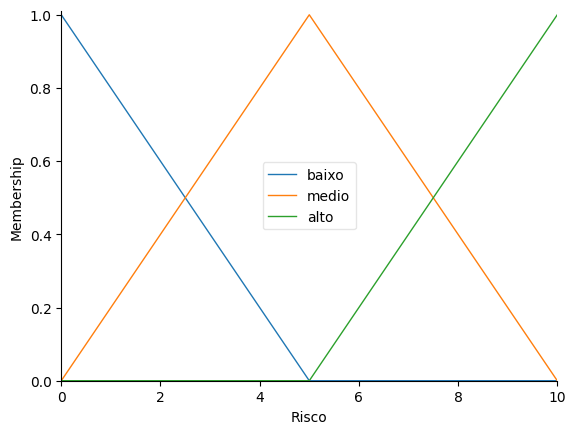

In [249]:
risco.automf(number=3, names=['baixo', 'medio', 'alto'])

risco.view()

## **BASE DE REGRAS**

In [250]:
rule1 = ctrl.Rule(marco_01['normal'] & marco_02['normal'], risco['baixo'])
rule2 = ctrl.Rule(marco_01['normal'] & marco_02['levemente atrasado'], risco['baixo'])
rule3 = ctrl.Rule(marco_01['normal'] & marco_02['atrasado'], risco['medio'])
rule4 = ctrl.Rule(marco_01['normal'] & marco_02['altamente atrasado'], risco['alto'])

rule5 = ctrl.Rule(marco_01['levemente atrasado'] & marco_02['normal'], risco['baixo'])
rule6 = ctrl.Rule(marco_01['levemente atrasado'] & marco_02['levemente atrasado'], risco['baixo'])
rule7 = ctrl.Rule(marco_01['levemente atrasado'] & marco_02['atrasado'], risco['medio'])
rule8 = ctrl.Rule(marco_01['levemente atrasado'] & marco_02['altamente atrasado'], risco['alto'])

rule9 = ctrl.Rule(marco_01['atrasado'] & marco_02['normal'], risco['medio'])
rule10 = ctrl.Rule(marco_01['atrasado'] & marco_02['levemente atrasado'], risco['medio'])
rule11 = ctrl.Rule(marco_01['atrasado'] & marco_02['atrasado'], risco['alto'])
rule12 = ctrl.Rule(marco_01['atrasado'] & marco_02['altamente atrasado'], risco['alto'])

rule13 = ctrl.Rule(marco_01['altamente atrasado'] & marco_02['normal'], risco['alto'])
rule14 = ctrl.Rule(marco_01['altamente atrasado'] & marco_02['levemente atrasado'], risco['alto'])
rule15 = ctrl.Rule(marco_01['altamente atrasado'] & marco_02['atrasado'], risco['alto'])
rule16 = ctrl.Rule(marco_01['altamente atrasado'] & marco_02['altamente atrasado'], risco['alto'])


## Predição

In [251]:
risco_predicao = ctrl.ControlSystem([rule1, rule2, rule3, rule4,
                                     rule5, rule6, rule7, rule8,
                                     rule9, rule10, rule11, rule12,
                                     rule13, rule14, rule15, rule16])

recomendacao = ctrl.ControlSystemSimulation(risco_predicao)

8.333333333333334


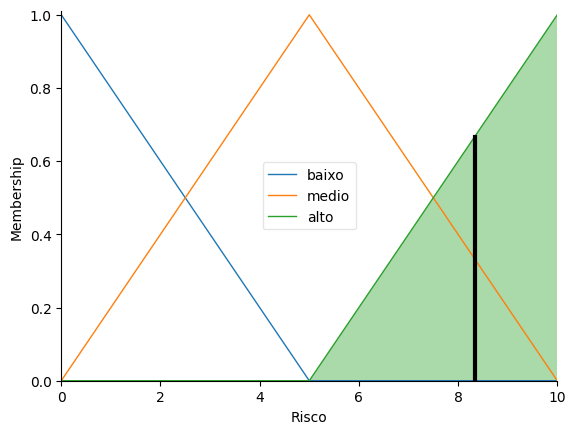

In [252]:
recomendacao.input['Marco 1'] = 7
recomendacao.input['Marco 2'] = 8

recomendacao.compute()

print(recomendacao.output['Risco'])
risco.view(sim = recomendacao)

## **ANÁLISE DAS SUPERFÍCIES**

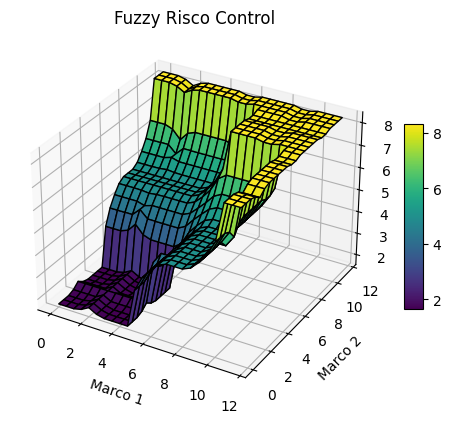

In [253]:
risco_values = np.zeros((len(_12_months), len(_12_months)))

for i, m1 in enumerate(_12_months):
    for j, m2 in enumerate(_12_months):
        recomendacao.input['Marco 1'] = m1
        recomendacao.input['Marco 2'] = m2
        recomendacao.compute()
        risco_values[i, j] = recomendacao.output['Risco']

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

X, Y = np.meshgrid(_12_months, _12_months)

surf = ax.plot_surface(X, Y, risco_values, cmap='viridis', edgecolor='k')

ax.set_xlabel('Marco 1')
ax.set_ylabel('Marco 2')
ax.set_zlabel('Risco')

fig.colorbar(surf, ax=ax, shrink=0.5, aspect=10)

plt.title('Fuzzy Risco Control')
plt.show()

# **DÚVIDA** (desconsiderar por enquanto)

## Marco 15: Localiza o som

In [254]:
# Como ter 2
marco_15 = ctrl.Antecedent(_12_months, '15° Marco')

marco_15['levemente precoce'] = fuzz.trapmf(marco_15.universe, [0, 0, 2, 4])
marco_15['normal'] = fuzz.trapmf(marco_15.universe, [1, 3, 6, 8])
marco_15['levemente atrasado'] = fuzz.trapmf(marco_15.universe, [5, 7, 9, 11])
marco_15['atrasado'] = fuzz.trapmf(marco_15.universe, [8, 10, 12, 12])

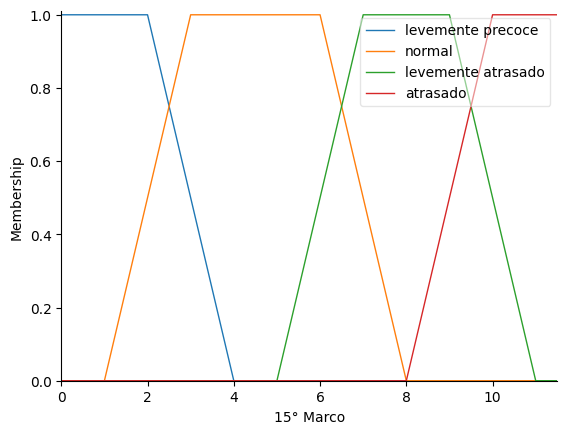

In [255]:
marco_15.view()

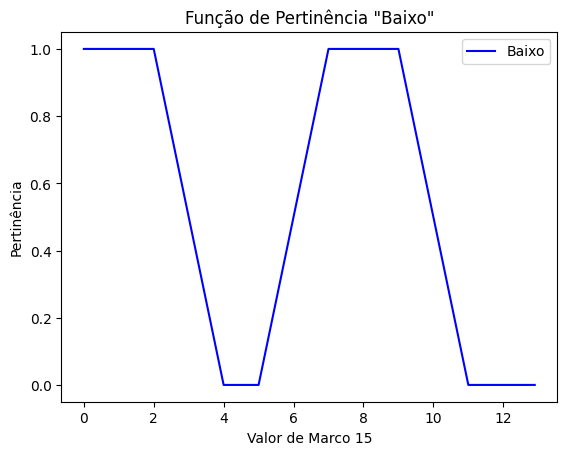

In [256]:
marco_15 = np.arange(0, 13, 0.1)

# Definição das funções de pertinência fuzzy
baixo1 = fuzz.trapmf(marco_15, [0, 0, 2, 4])
baixo2 = fuzz.trapmf(marco_15, [5, 7, 9, 11])

# União das funções de pertinência "baixo"
baixo = np.maximum(baixo1, baixo2)

# Visualização da função de pertinência "baixo"
plt.figure()

plt.plot(marco_15, baixo, 'b', label='Baixo')

plt.title('Função de Pertinência "Baixo"')
plt.xlabel('Valor de Marco 15')
plt.ylabel('Pertinência')

plt.legend()
plt.show()